# <strong><center><font color=green>Pose_Estimation</font></center></strong>

## <strong><font color=green>  Opciones de Configuracion</font></strong> 

![Pose landmark model](./imgs/pose_tracking_full_body_landmarks.png)

- TATIC_IMAGE_MODE: Si se establece en false, la solución trata las imágenes de entrada como una transmisión de video. Intentará detectar a la persona más prominente en las primeras imágenes, y en una detección exitosa localiza aún más los puntos de referencia de la pose. En imágenes posteriores, simplemente rastrea esos puntos de referencia sin invocar otra detección hasta que pierde el rastro, reduciendo la computación y la latencia. Si se establece en true, la detección de persona ejecuta cada imagen de entrada, ideal para procesar un lote de imágenes estáticas, posiblemente no relacionadas. Predeterminado a false.

- MODEL_COMPLEXITY: Complejidad del modelo de punto de referencia de pose: `0, 1 o 2`. La precisión del marcador, así como la latencia de inferencia, generalmente aumentan con la complejidad del modelo. Predeterminado a `1`.

- SMOOTH_LANDMARKS: Si se establece en true, los filtros de solución plantean puntos de referencia en diferentes imágenes de entrada para reducir el fluctuación de fase, pero se ignoran si static_image_mode también está configurado para true. Predeterminado a true.

- ENABLE_SEGMENTATION: Si se establece en true, además de los puntos de referencia de la pose, la solución también genera la máscara de segmentación. Predeterminado a false.

- SMOOTH_SEGMENTATION: Si se establece en `true`, la solución filtra las máscaras de segmentación en diferentes imágenes de entrada para reducir el jitter. Ignorado si habilitar_segmentación es `false` o static_image_mode es `true`. Predeterminado a `true`.

- MIN_DETECTION_CONFIDENCE: Valor mínimo de confianza `([0.0, 1.0])` del modelo de detección de persona para que la detección se considere exitosa. Predeterminado a `0.5`.

- MIN_TRACKING_CONFIDENCE: Valor mínimo de confianza `([0.0, 1.0])` del modelo de seguimiento de puntos de referencia para que los puntos de referencia de pose se consideren rastreados con éxito, o de lo contrario se invocará automáticamente la detección de persona en la siguiente imagen de entrada. Establecerlo en un valor más alto puede aumentar la robustez de la solución, a expensas de una latencia más alta. Ignorado si static_image_mode es true, donde la detección de personas simplemente se ejecuta en cada imagen. Predeterminado a `0.5`.

### Salida


- POSE_LANDMARKS:
    Una lista de puntos de referencia de pose. Cada punto de referencia consta de lo siguiente:

    - x y y: Coordenadas del marcador normalizadas a `[0.0, 1.0]` por el ancho y la altura de la imagen respectivamente.
    - z: Representa la profundidad de referencia con la profundidad en el punto medio de las caderas como origen, y cuanto menor sea el valor, más cerca estará el punto de referencia de la cámara. La magnitud de z usa aproximadamente la misma escala que x.
    - visibility: Un valor en `[0.0, 1.0]` indicando la probabilidad de que el punto de referencia sea visible ( presente y no ocluido ) en la imagen.
    
- POSE_WORLD_LANDMARKS: Otra lista de puntos de referencia de pose en coordenadas mundiales. Cada punto de referencia consta de lo siguiente:

    - x, y y z: Coordenadas 3D del mundo real en metros con el origen en el centro entre las caderas.
    - visibility: Idéntico al definido en el correspondiente Pose_landmarks.
    

[Fuente](https://google.github.io/mediapipe/solutions/pose.html)

## <strong><font color=green> Explicacion del codigo!!</font></strong> 

In [2]:
#importamos librerias 
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image 

In [3]:
# creamos las instancias necesarias de para realizar la inferencia
mp_pose = mp.solutions.pose  # solucion que nos permite inferir la posee
mp_drawing = mp.solutions.drawing_utils # utilidades para dibujar
mp_drawing_styles = mp.solutions.drawing_styles # estilos para dibujar

In [4]:
# confihuramos los parametros de nuestro detector
pose = mp_pose.Pose( static_image_mode=True, # le decimos que trabajaremos sobre imagenes estaticas
                     min_detection_confidence=0.5, # un minimo de confianza de 50% en la deteccion
                     min_tracking_confidence=0.5)  # unminimo de confianza del 50% en el tracking

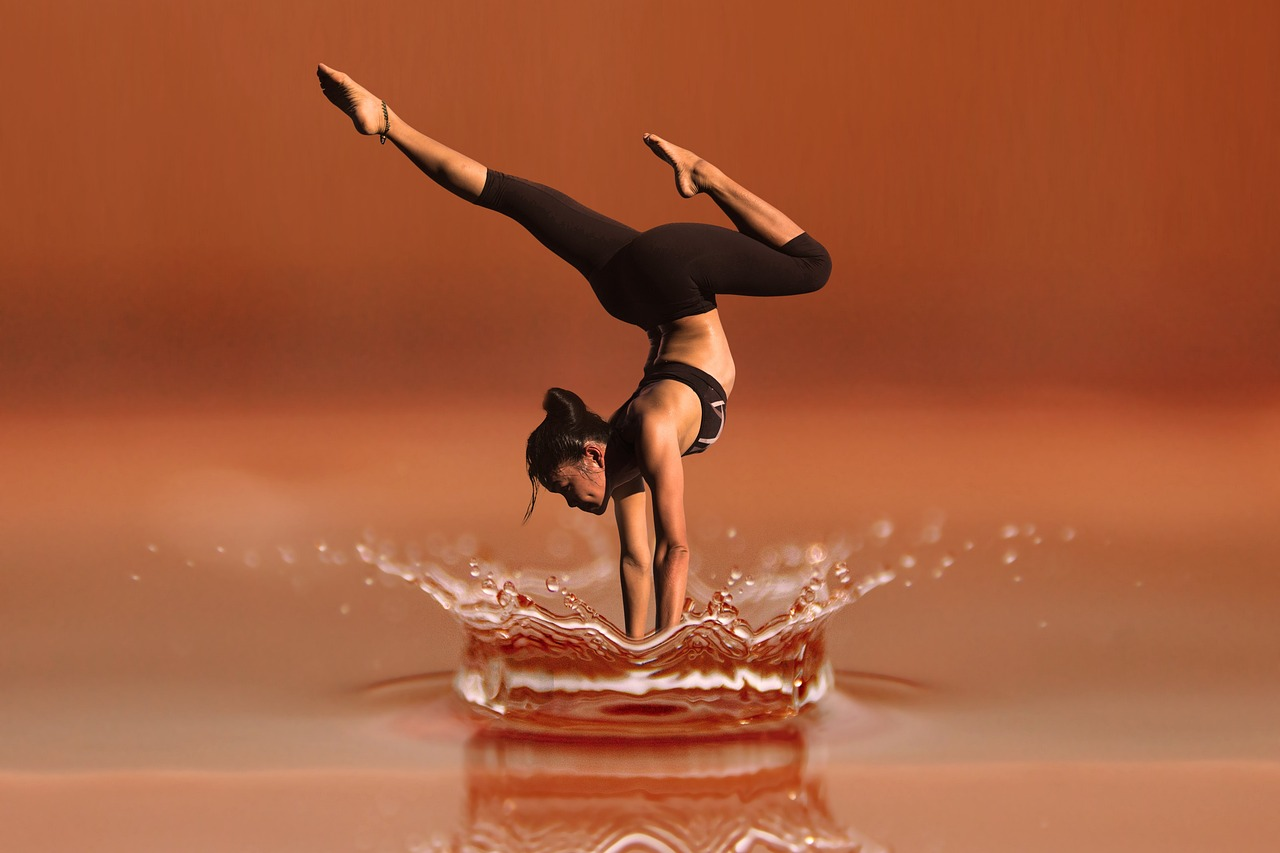

In [18]:
# haciendo uso de Ipython.display.Image mostramos la imagen 
path="./imgs/yoga2.jpg"
Image(path)

In [19]:
img = cv.imread(path) # cargamos la imagen con la cual vamos a trabajar
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # realizamos un cambio de espacio de color a RGB
img_pro = img.copy() # creamos una copia de la imagen

In [20]:
results = pose.process(img) # realizamos la prediccion

In [21]:
# si nuestra prediccion tiene resultados ingresara al if
if results.pose_landmarks:
    land_marks = results.pose_landmarks # extraemos los puntos importantes
    for id, mark in enumerate(land_marks.landmark): # enumeramos e imprimimos los las cordenadas de los puntos importantes
        print(mark)
        

x: 0.45245248079299927
y: 0.5951342582702637
z: -0.2365054190158844
visibility: 0.9997209906578064

x: 0.4440121054649353
y: 0.5796633958816528
z: -0.2557705044746399
visibility: 0.9997878670692444

x: 0.4446212649345398
y: 0.5764729976654053
z: -0.2560488283634186
visibility: 0.9998354911804199

x: 0.445349782705307
y: 0.5732628703117371
z: -0.25613468885421753
visibility: 0.9998340606689453

x: 0.4435097575187683
y: 0.5811666250228882
z: -0.2282121479511261
visibility: 0.9998058676719666

x: 0.4436801075935364
y: 0.579403281211853
z: -0.22848519682884216
visibility: 0.9998663663864136

x: 0.4438689351081848
y: 0.5778132081031799
z: -0.2285277396440506
visibility: 0.9998703002929688

x: 0.45399826765060425
y: 0.5519134402275085
z: -0.3029259145259857
visibility: 0.9999449253082275

x: 0.4516494870185852
y: 0.558074951171875
z: -0.17771798372268677
visibility: 0.9998148083686829

x: 0.4651203751564026
y: 0.5901603102684021
z: -0.24708512425422668
visibility: 0.9996640682220459

x: 0.46

In [22]:
#dibujamos los puntos y sus conexiones en la imagen 
mp_drawing.draw_landmarks(img_pro,     # imagen a dibujar
                         results.pose_landmarks, # puntos
                         mp_pose.POSE_CONNECTIONS, # conexiones
                         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()) # estilo


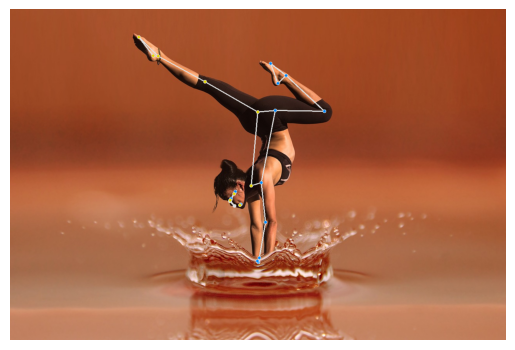

In [24]:
# mostramos la imagen dibujado las posees
import matplotlib.pyplot as plt
plt.imshow(img_pro)
plt.axis("off")
plt.show()


## <strong><font color=green> Deteccion de Pose en imagenes Estaticas</font></strong> 

In [25]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5)

In [26]:
# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_estimation(img_res):
    
    results = pose.process(img_res)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(img_res,
                         results.pose_landmarks,
                         mp_pose.POSE_CONNECTIONS,
                         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    plt.imshow(img_res)
    plt.axis("off")
    plt.show()
    

### <strong><font color=blue> Probamos con algunas Imagenes </font></strong> 

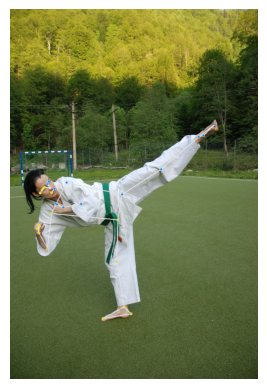

In [27]:
path= "./imgs/karate.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_estimation(img)

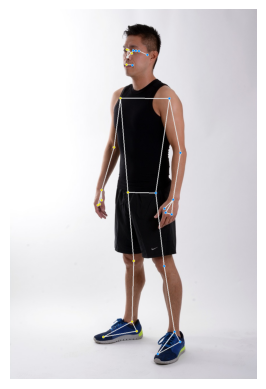

In [28]:
path= "./imgs/man.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_estimation(img)

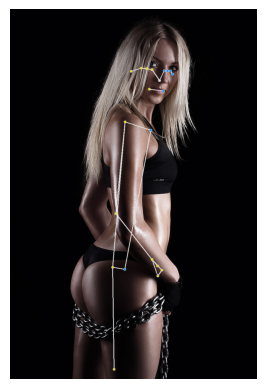

In [29]:
path= "./imgs/sports.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_estimation(img)

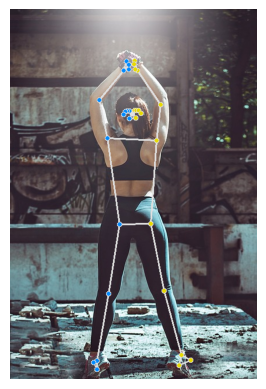

In [30]:
path= "./imgs/sports2.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_estimation(img)

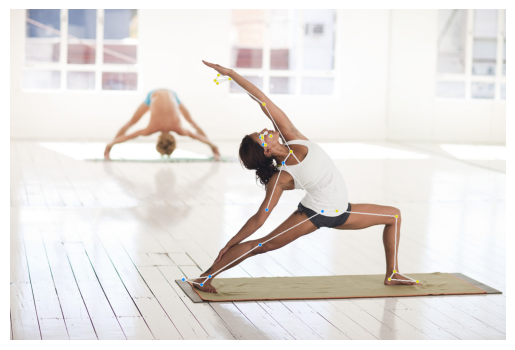

In [31]:
path= "./imgs/yoga.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_estimation(img)

## Pose estimation en Video

In [32]:
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

pose = mp_pose.Pose( static_image_mode=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5)



def pose_estimation(img_res):
    
    img_res = cv.cvtColor(img_res, cv.COLOR_BGR2RGB)
    results = pose.process(img_res)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(img_res,
                         results.pose_landmarks,
                         mp_pose.POSE_CONNECTIONS,
                         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    
    img_res = cv.cvtColor(img_res, cv.COLOR_RGB2BGR)
    return img_res

##----------PRINCIPAL CODDE -------------------
cv.namedWindow("Pose Estimation", cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)

while cap.isOpened():
    
    ret, frame= cap.read()
    if ret:
        
        img_ret = pose_estimation(frame)
        cv.imshow("Pose Estimation", img_ret)
        
        key = cv.waitKey(5)
        if key==27:
            break
    else:
        break
        
cap.release()
cv.destroyAllWindows()

## <strong><font color=green> Graficación en 3d de los puntos de interes</font></strong> 

In [33]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5)

In [34]:
# creamos una funcion que nos permite realizar la inferencia y graficar en 3d los puntos de interes y sus conexiones
def plot_landmark_pose(img_res):
    
    results = pose.process(img_res)
    if results.pose_landmarks:
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
          

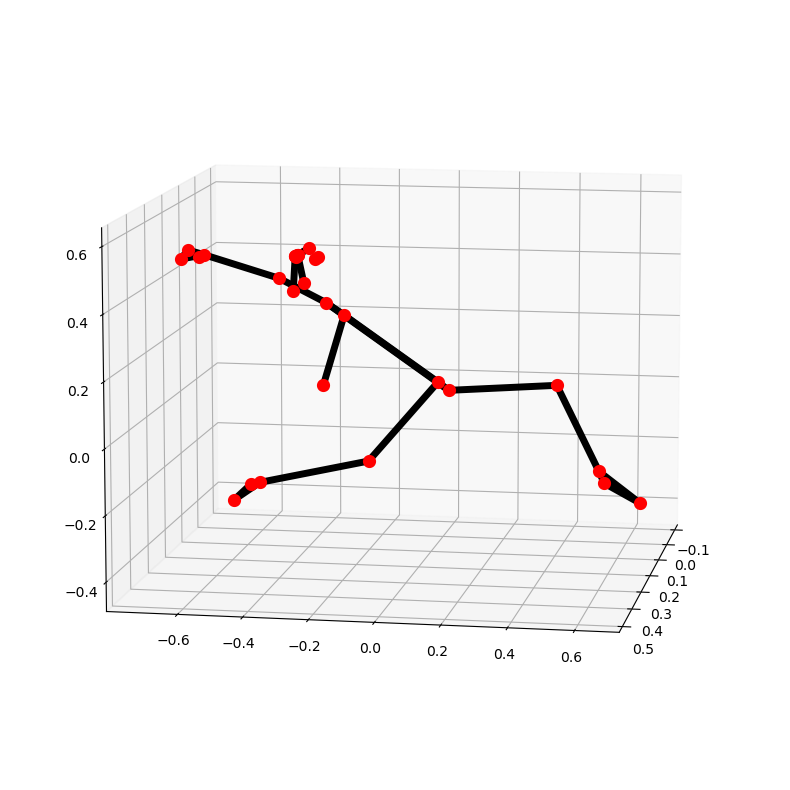

In [35]:
path= "./imgs/yoga.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
plot_landmark_pose(img)

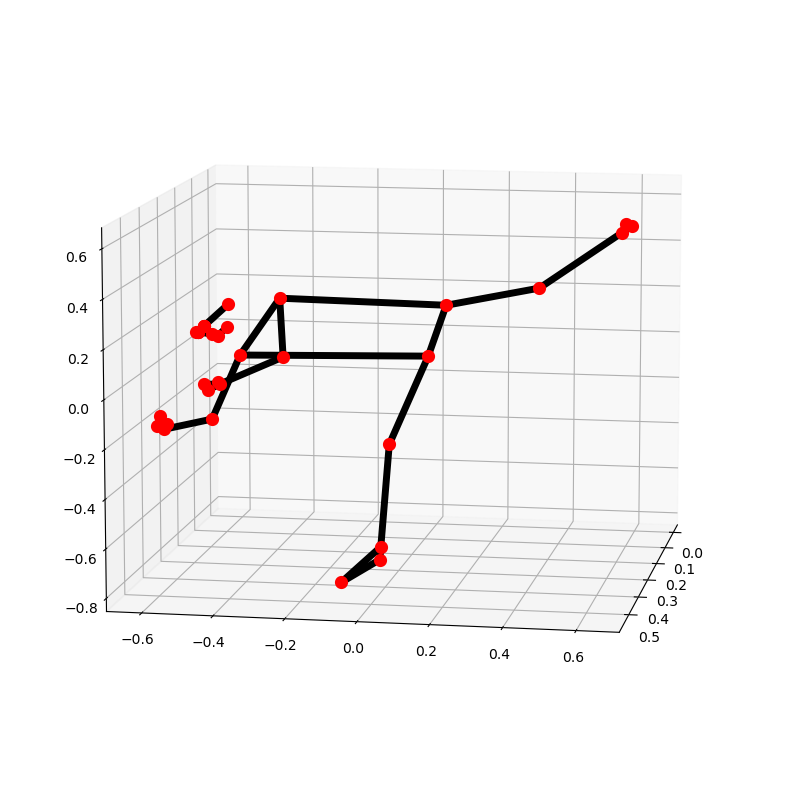

In [36]:
path= "./imgs/Karate.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
plot_landmark_pose(img)

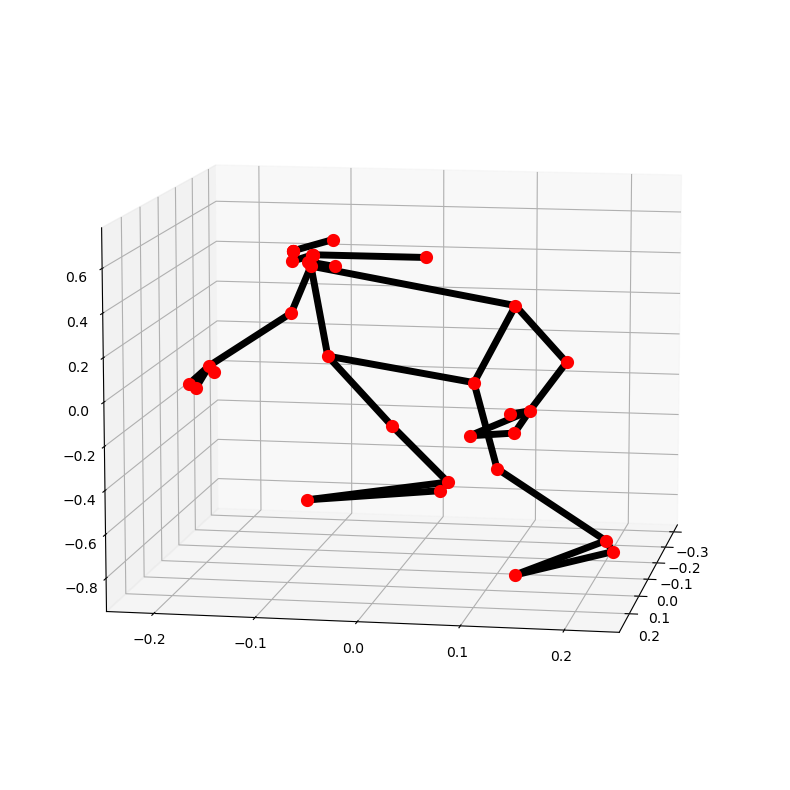

In [37]:
path= "./imgs/man.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
plot_landmark_pose(img)

## <strong><font color=green> Segmentación en Imagenes</font></strong> 

### <strong><font color=blue> Explicación</font></strong> 

In [38]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

path= "./imgs/man.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

pros_img = img.copy()
results = pose.process(img)

#if results.pose_landmarks:


<class 'numpy.ndarray'>
(1280, 853, 3)


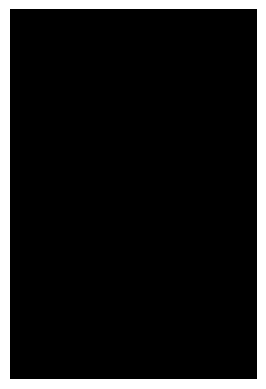

In [39]:
#usando np.zeros_like creamos una mascara con las mismas dimensiones de la imagen original de tipo enteto de 8bits
red_img = np.zeros_like(pros_img, dtype=np.uint8)
print(type(red_img))
print(red_img.shape)
plt.imshow(red_img)
plt.axis("off")
plt.show()

<class 'numpy.ndarray'>
(1280, 853, 3)


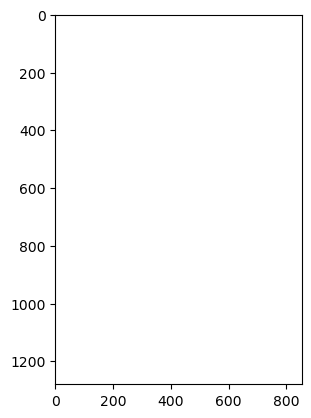

In [40]:
# llenamos la mascara con valores de 255 en todos los pixeles de todos los canales
red_img[:,:] = (255,255,255)
    
print(type(red_img))
print(red_img.shape)
plt.imshow(red_img)
#plt.axis("off")
plt.show()

<class 'numpy.ndarray'>
(1280, 853)


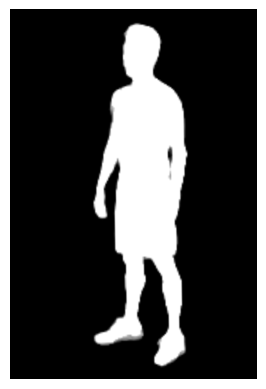

In [41]:
segm_img = 0.1 + 0.9 * results.segmentation_mask

print(type(segm_img))
print(segm_img.shape)
#print(segm_img)
plt.imshow(segm_img, cmap="gray")
plt.axis("off")
plt.show()

<class 'numpy.ndarray'>
(1280, 853, 3)


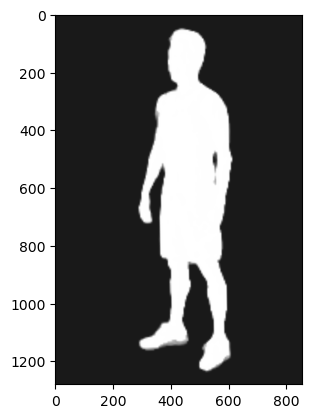

In [42]:
# la funcion repeat de numpy(np.repeat), nos ayuda a repetir los elementos de un array y a expandir esta repeticion 
# en otras dimensioniones numpy.repeat(a, repeats, axis=None)[source]

segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)

print(type(segm_img))
print(segm_img.shape)
#print(segm_img)
plt.imshow(segm_img)
#plt.axis("off")
plt.show()

<class 'numpy.ndarray'>
(1280, 853, 3)


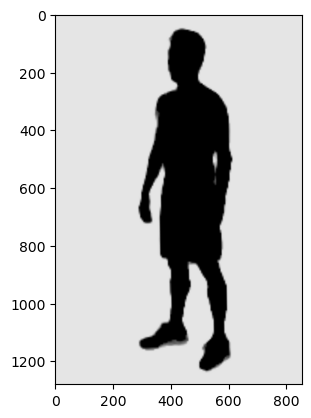

In [43]:
res_img1 = red_img * (1 - segm_img)
res_img1 = np.array(res_img1, dtype='uint8')
print(type(res_img1))
print(res_img1.shape)
#print(res_img1)
plt.imshow(res_img1, cmap="gray")
#plt.axis("off")
plt.show()

<class 'numpy.ndarray'>
(1280, 853, 3)


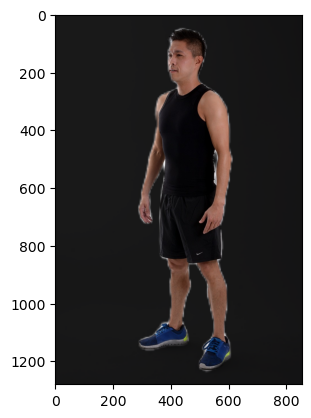

In [44]:
res_img2 = pros_img * segm_img

res_img2 = np.array(res_img2, dtype='uint8') 
print(type(res_img2))
print(res_img2.shape)

plt.imshow(res_img2, cmap="gray")
#plt.axis("off")
plt.show()

In [45]:
pros_img = res_img1 + res_img2


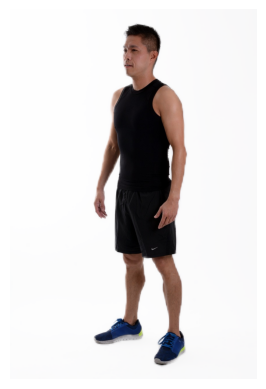

In [46]:
pros_img = np.array(pros_img, dtype='uint8')    

plt.imshow(pros_img)
plt.axis("off")
plt.show()


### <strong><font color=blue> Segmentación en Imagene Estaticas codigo completo</font></strong> 

In [56]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

In [57]:
# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_segmentation(img_res):
    pros_img = img_res.copy()
    results = pose.process(img_res)
    if results.pose_landmarks:
        red_img = np.zeros_like(pros_img, dtype=np.uint8)
        red_img[:, :] = (255,255,255)
        segm_img = 0.1 + 0.9 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        res_img1 = red_img * (1 - segm_img)
        res_img2 = pros_img * segm_img
        pros_img = res_img1 + res_img2
        pros_img = np.array(pros_img, dtype='uint8') 
        
    plt.imshow(pros_img)
    plt.axis("off")
    plt.show()
    

### <strong><font color=blue> Pruebas</font></strong> 

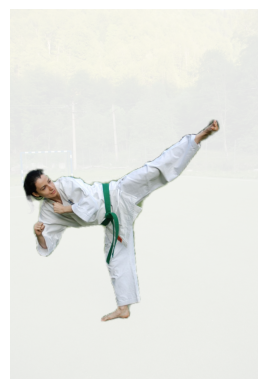

In [58]:
path= "./imgs/karate.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_segmentation(img)

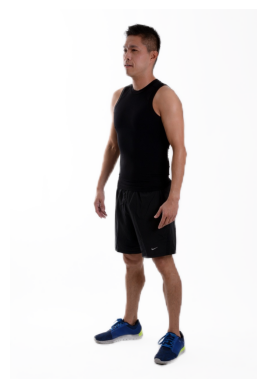

In [50]:
path= "./imgs/man.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_segmentation(img)

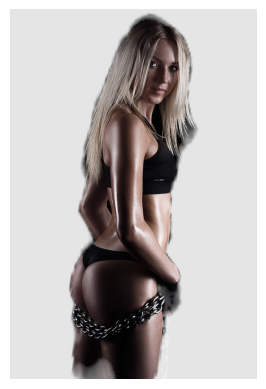

In [51]:
path= "./imgs/sports.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_segmentation(img)

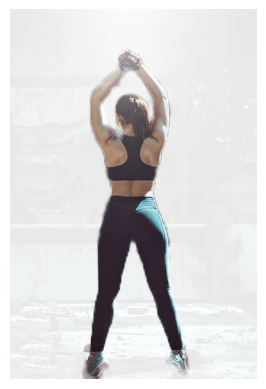

In [52]:
path= "./imgs/sports2.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_segmentation(img)

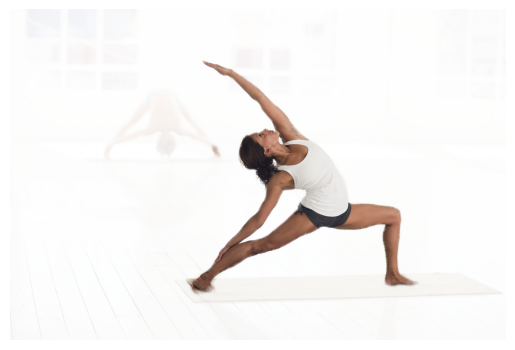

In [53]:
path= "./imgs/yoga.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_segmentation(img)

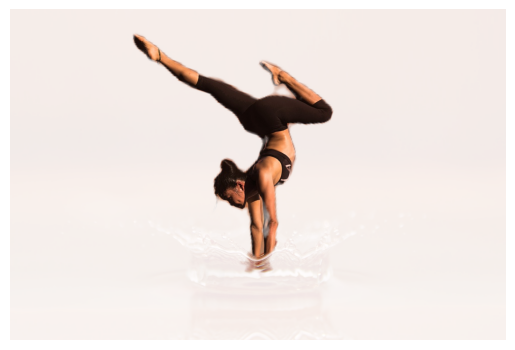

In [54]:
path= "./imgs/yoga2.jpg"
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pose_segmentation(img)

## <strong><font color=green> Segmentación en Video</font></strong> 

In [63]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

def pose_segmentation(img_res):
    img_res = cv.cvtColor(img_res, cv.COLOR_BGR2RGB)
    pros_img = img_res.copy()
    results = pose.process(img_res)
    if results.pose_landmarks:
        red_img = np.zeros_like(pros_img, dtype=np.uint8)
        red_img[:, :] = (255,255,255)
        segm_img = 0 + 1 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        res_img1 = red_img * (1 - segm_img)
        res_img2 = pros_img * segm_img
        pros_img = res_img1 + res_img2
        pros_img = np.array(pros_img, dtype='uint8') 
        
    pros_img = cv.cvtColor(pros_img, cv.COLOR_RGB2BGR)
    return pros_img
 
        
##****************************************************************************************
##---------------------Codigo Principal--------------------------------------------------

cv.namedWindow("Salida", cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)

while cap.isOpened():
    
    ret, frame = cap.read()
    
    if ret:
        
        res = pose_segmentation(frame)
        cv.imshow("Salida", res)
        
        if cv.waitKey(10) & 0xFF==27:
            break
            
    else:
        break
        
cap.release()
cv.destroyAllWindows()
    

## <strong><font color=green> Cambiando el fondo de una imagen usando segmentación</font></strong> 

In [153]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

In [168]:
# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_segmentation(img_res, fondo):
    #igualamos las dimensiones de las imagenes
    hf,wf,c = fondo.shape
    print(fondo.shape)
    hs,ws,c = img_res.shape
    print(img_res.shape)
    img_res = cv.resize(img_res,(int(hf/hs*ws),hf))
    hs,ws,c = img_res.shape
    print(img_res.shape)
    #***********************
    
    pros_img = img_res.copy()
    results = pose.process(img_res)
    if results.pose_landmarks:
        red_img = fondo[0:hs,0:ws]

        segm_img = 0.1 + 0.9 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        img_res1 = red_img * (1 - segm_img)
        img_res2 = pros_img * segm_img 
        pros_img = img_res1 + img_res2 
        pros_img = np.array(pros_img, dtype='uint8') 
        fondo[0:hs,0:ws]=pros_img
    plt.imshow(fondo)
    plt.axis("off")
    plt.show()
    

(718, 1280, 3)
(1280, 853, 3)
(718, 478, 3)


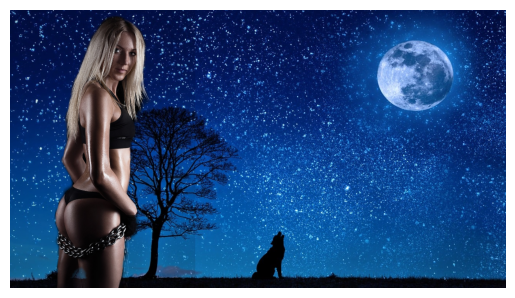

In [172]:
path1 = "sports.jpg"
path2 = "./fondos/f1.jpg"
img1 = cv.cvtColor(cv.imread(path1), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(path2), cv.COLOR_BGR2RGB)

pose_segmentation(img1, img2)

(1043, 1280, 3)
(640, 427, 3)
(1043, 695, 3)


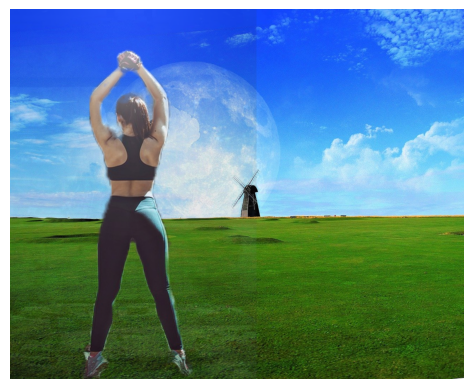

In [171]:
path1 = "sports2.jpg"
path2 = "./fondos/f5.jpg"
img1 = cv.cvtColor(cv.imread(path1), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(path2), cv.COLOR_BGR2RGB)

pose_segmentation(img1, img2)

### <strong><font color=blue> Moviendo nuestra imagen </font></strong> 

In [153]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt
#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

In [179]:
# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_segmentation(img_res, fondo):
    #igualamos las dimensiones de las imagenes
    hf,wf,c = fondo.shape
    print(fondo.shape)
    hs,ws,c = img_res.shape
    print(img_res.shape)
    
    # La dimesion en x a cambiar debe tener la misma relacion de cambio de y por lo tanto para obtener esa relacion
    # de divide el alto de la imagen de fondo / sobre la altura de la imagen a segmentar y  el tamaño a modificar en x se obtiene
    # multiplicando esta relacion por el ancho de la imagen a segmentar
    
    img_res = cv.resize(img_res,(int(hf/hs*ws),hf))
    hs,ws,c = img_res.shape
    print(img_res.shape)
    #***********************
    
    pros_img = img_res.copy()
    results = pose.process(img_res)
    dx = 100
    if results.pose_landmarks:
        red_img = fondo[0:hs,dx:ws+dx]

        segm_img = 0 + 1 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        img_res1 = red_img * (1 - segm_img)
        img_res2 = pros_img * segm_img 
        pros_img = img_res1 + img_res2 
        pros_img = np.array(pros_img, dtype='uint8') 
        fondo[0:hs,dx:ws+dx]=pros_img
    plt.imshow(fondo)
    plt.axis("off")
    plt.show()
    

(1043, 1280, 3)
(640, 427, 3)
(1043, 695, 3)


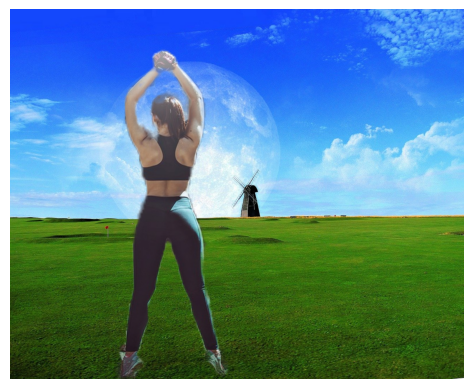

In [180]:
path1 = "sports2.jpg"
path2 = "./fondos/f5.jpg"
img1 = cv.cvtColor(cv.imread(path1), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(path2), cv.COLOR_BGR2RGB)

pose_segmentation(img1, img2)

### <strong><font color=blue> Utilizando el GUI de OpenCv </font></strong> 

In [14]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt

#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )
def nothing(x):
    pass

# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_segmentation(img_res, fondo,dx):
    #igualamos las dimensiones de las imagenes
    hf,wf,c = fondo.shape
    hs,ws,c = img_res.shape
    img_res = cv.resize(img_res,(int(hf/hs*ws),hf))
    hs,ws,c = img_res.shape
    #***********************
    
    pros_img = img_res.copy()
    pros_fondo = fondo.copy()
    results = pose.process(img_res)
    #dx = 100
    if results.pose_landmarks:
        
        red_img = fondo[0:hs,dx:ws+dx]

        segm_img = 0 + 1 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        img_res1 = red_img * (1 - segm_img)
        img_res2 = pros_img * segm_img 
        pros_img = img_res1 + img_res2 
        pros_img = np.array(pros_img, dtype='uint8') 
        pros_fondo[0:hs,dx:ws+dx]=pros_img
    return pros_fondo

##***********************************************************
##---------------Codigo Principal---------------------------

#Creamos la ventana donde se mostrara el resultado
cv.namedWindow("Salida", cv.WINDOW_NORMAL)
# leemos las iamgenes aprocesar
path1 = "karate.jpg"
path2 = "./fondo/f5.jpg"
img = cv.cvtColor(cv.imread(path1), cv.COLOR_BGR2RGB)
img_f = cv.cvtColor(cv.imread(path2), cv.COLOR_BGR2RGB)

hf,wf,c = img_f.shape
h,w,c = img.shape

## Creamos el trackbar para el desplazamiento en X
cv.createTrackbar("pos_x","Salida",0,wf-w,nothing)

while True:
    dx = cv.getTrackbarPos("pos_x","Salida")
    
    img = cv.cvtColor(cv.imread(path1), cv.COLOR_BGR2RGB)
    img_f = cv.cvtColor(cv.imread(path2), cv.COLOR_BGR2RGB)
    
    img = pose_segmentation(img,img_f,dx)
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    
    cv.imshow("Salida", img)
    if cv.waitKey(1) & 0xFF==ord("q"):
        break
        
cv.destroyAllWindows()
    

###  <strong><font color=blue>Resultado desplazando la imagen en el GUI </font></strong>

![imagen](res_1.png)

## <strong><font color=green>Segmentación desde la Camara web </font></strong> 

In [13]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt

#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_segmentation(img_res, fondo):
    #igualamos las dimensiones de las imagenes
   
    pros_img = img_res.copy()

    results = pose.process(img_res)
    #dx = 100
    if results.pose_landmarks:
        
        red_img = fondo.copy()

        segm_img = 0 + 1 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        img_res1 = red_img * (1 - segm_img)
        img_res2 = pros_img * segm_img 
        pros_img = img_res1 + img_res2 
        pros_img = np.array(pros_img, dtype='uint8') 

    return pros_img

##***********************************************************
##---------------Codigo Principal---------------------------

#Creamos la ventana donde se mostrara el resultado
cv.namedWindow("Salida", cv.WINDOW_NORMAL)
path = "./fondos/f1.jpg"
img_f = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

cap = cv.VideoCapture(0)
while cap.isOpened:
    img_f = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
    
    ret, frame = cap.read()
    h,w,c = frame.shape
    img_f = cv.resize(img_f,(w,h))
    if ret:
        img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)  
        img = pose_segmentation(img,img_f)
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

        cv.imshow("Salida", img)
        if cv.waitKey(1) & 0xFF==ord("q"):
            break
    else:
        break
cap.release()        
cv.destroyAllWindows()

###  <strong><font color=blue>Resultado en Video </font></strong> 

![imagen](res_2.png)

## <strong><font color=green>Cambiando los fondos de nuestro video</font></strong> 

In [64]:
# importamos librerias
import cv2 as cv 
import numpy as np 
import mediapipe as mp
from IPython.display import Image
import matplotlib.pyplot as plt

#instanciamos los objetos necesarios
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# configuramos nuestro detector
pose = mp_pose.Pose( static_image_mode=True,
                     model_complexity=2,
                     enable_segmentation=True,
                     min_detection_confidence=0.5,
                     min_tracking_confidence=0.5,
                   )

# creamos una funcion que nos permite realizar la inferencia y dibujar nuestros resultados
def pose_segmentation(img_res, fondo):
    #igualamos las dimensiones de las imagenes
   
    pros_img = img_res.copy()

    results = pose.process(img_res)
    #dx = 100
    if results.pose_landmarks:
        
        red_img = fondo.copy()

        segm_img = 0 + 1 * results.segmentation_mask
        segm_img = np.repeat(segm_img[..., np.newaxis], 3, axis=2)
        img_res1 = red_img * (1 - segm_img)
        img_res2 = pros_img * segm_img 
        pros_img = img_res1 + img_res2 
        pros_img = np.array(pros_img, dtype='uint8') 

    return pros_img

##***********************************************************
##---------------Codigo Principal---------------------------

#Creamos la ventana donde se mostrara el resultado
cv.namedWindow("Original", cv.WINDOW_NORMAL)
cv.namedWindow("Aplicando_Segmentacion", cv.WINDOW_NORMAL)

path1 = "./fondos/f1.jpg"
path2 = "./fondos/f2.jpg"
path3 = "./fondos/f3.jpg"
path4 = "./fondos/f4.jpg"
path5 = "./fondos/f5.jpg"

paths = [path1, path2, path3, path4, path5]
cont = 0

cap = cv.VideoCapture(0)

while cap.isOpened: 
    ret, frame = cap.read()  
    
    if ret:
        op_in = cv.waitKey(10)
        if op_in == ord("q"):
            break
        elif op_in == ord("a"):
            if cont==4:
                cont = 0
            else:
                cont+=1
        
        img_f = cv.cvtColor(cv.imread(paths[cont]), cv.COLOR_BGR2RGB)
        h,w,c = frame.shape
        img_f = cv.resize(img_f,(w,h))
        img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)  
        img = pose_segmentation(img,img_f)
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

        cv.imshow("Aplicando_Segmentacion", img)
        cv.imshow("Original", frame)
        
    else:
        break
cap.release()        
cv.destroyAllWindows()

#  <strong><font color=green>FIN </font></strong> 